In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

df_demo = pd.read_csv("/home/rafael/Área de Trabalho/CUROS IRONHACK/SEMANA 6/PROJETO 2/vanguard-ab-test/data/raw/df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [2]:
df_demo.isna().sum().sort_values()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
bal                 14
num_accts           14
calls_6_mnth        14
logons_6_mnth       14
clnt_age            15
dtype: int64

In [3]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [4]:
if 'client_id' in df_demo.columns:
    print('Duplicated client_id:', df_demo['client_id'].duplicated().sum())

Duplicated client_id: 0


In [5]:
print("Total de linhas com nulos:", df_demo.isna().any(axis=1).sum())


Total de linhas com nulos: 15


In [6]:
df_demo = df_demo.dropna()
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0



Engagement pillar chosen: logons_6_mnth
Primary clients (count): 27052
Primary share (%): 38.32

=== Average profile (is_primary False/True) ===


/tmp/ipykernel_32050/1647423285.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo.loc[:, 'age_band'] = pd.cut(s, bins=bins, labels=labels, right=False)
/tmp/ipykernel_32050/1647423285.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo.loc[:, 'tenure_band'] = pd.cut(t, bins=bins, labels=labels, right=False)
/tmp/ipykernel_32050/1647423285.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,clnt_age,bal,num_accts,logons_6_mnth,calls_6_mnth
is_primary,,,,,
False,45.79,111146.24,2.17,4.00,2.00
True,47.49,205874.78,2.40,8.09,5.61



=== Primary client rate by age band (% ) ===


age_band
75-84    49.04
65-74    46.33
85+      41.03
55-64    40.51
25-34    39.34
<25      35.51
45-54    34.92
35-44    33.32
Name: is_primary, dtype: float64


=== Primary client rate by tenure band (% ) ===


tenure_band
30y+      47.35
20-30y    43.90
15-20y    38.82
5-10y     38.17
2-5y      36.82
10-15y    34.60
Name: is_primary, dtype: float64


=== Clients and % primary by gender ===


,clients,primary_share
gendr,,
Female,22745,32.80
Male,23724,44.62
Unknown,24122,37.33
X,3,33.33



=== Numeric correlations ===


,clnt_age,bal,num_accts,logons_6_mnth,calls_6_mnth
clnt_age,1.00,0.21,-0.02,0.08,0.03
bal,0.21,1.00,0.27,0.17,0.16
num_accts,-0.02,0.27,1.00,0.22,0.24
logons_6_mnth,0.08,0.17,0.22,1.00,0.82
calls_6_mnth,0.03,0.16,0.24,0.82,1.00


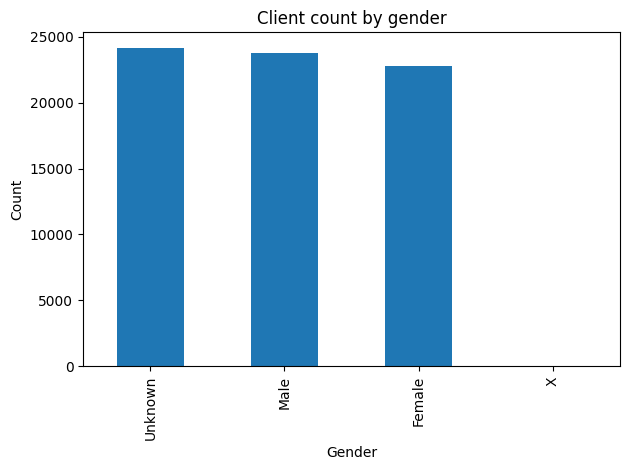

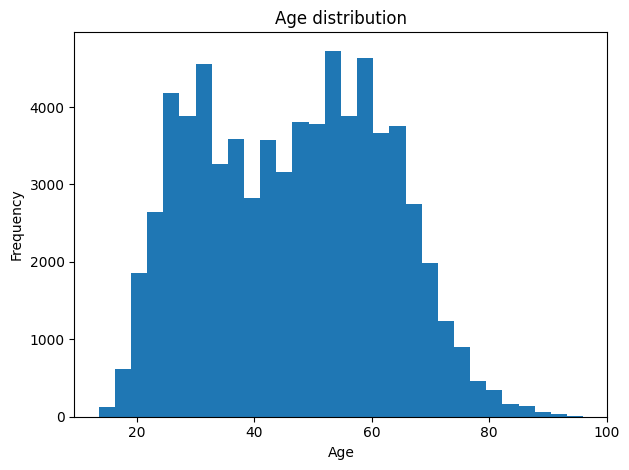

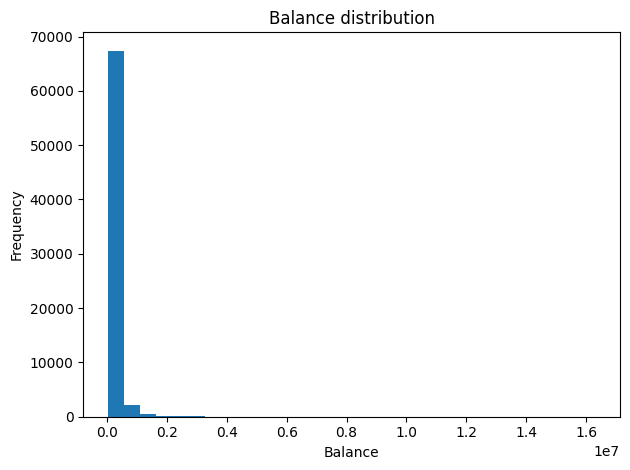

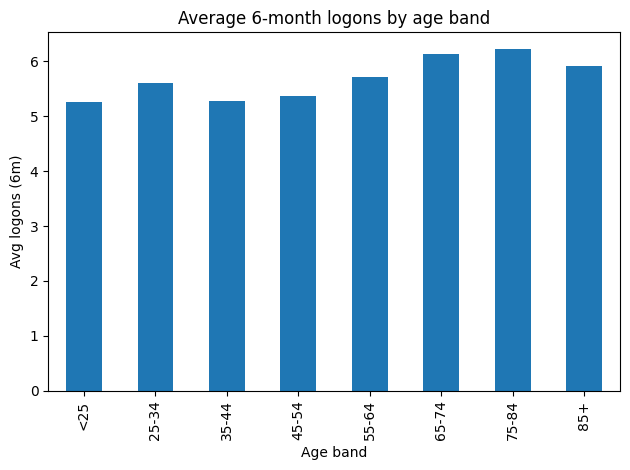

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_band,tenure_band,is_primary
0,836976,6.0,73.0,60.5,Unknown,2.0,45105.30,6.0,9.0,55-64,5-10y,True
1,2304905,7.0,94.0,58.0,Unknown,2.0,110860.30,6.0,9.0,55-64,5-10y,True
2,1439522,5.0,64.0,32.0,Unknown,2.0,52467.79,6.0,9.0,25-34,5-10y,True
3,1562045,16.0,198.0,49.0,Male,2.0,67454.65,3.0,6.0,45-54,15-20y,False
4,5126305,12.0,145.0,33.0,Female,2.0,103671.75,0.0,3.0,25-34,10-15y,False
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,Unknown,3.0,1411062.68,5.0,5.0,35-44,2-5y,False
70605,8981690,12.0,148.0,31.0,Male,2.0,101867.07,6.0,6.0,25-34,10-15y,False
70606,333913,16.0,198.0,61.5,Female,2.0,40745.00,3.0,3.0,55-64,15-20y,False
70607,1573142,21.0,255.0,68.0,Male,3.0,475114.69,4.0,4.0,65-74,20-30y,False


In [7]:
# ===== Data Cleaning Helper Functions =====

# Convert a column to integers safely (keep NaN, floor decimals if positive)
def coerce_int_col(df_demo, col):
    if col in df_demo.columns:
        df_demo.loc[:, col] = pd.to_numeric(df_demo[col], errors='coerce')
        if (df_demo[col] >= 0).all(skipna=True):
            df_demo.loc[:, col] = np.floor(df_demo[col]).astype('Int64')
        else:
            df_demo.loc[:, col] = df_demo[col].round().astype('Int64')


# Normalize gender values into 'Male', 'Female', or 'Unknown'
def normalize_gender(df_demo):
    candidates = [c for c in df_demo.columns if c.lower() in ('gendr','gender','sex')]
    if not candidates:
        return
    col = candidates[0]
    mapped = df_demo[col].astype(str).str.upper().str.strip().map({
        'M':'Male','MALE':'Male',
        'F':'Female','FEMALE':'Female',
        'U':'Unknown','UNK':'Unknown','UNKNOWN':'Unknown','NAN':'Unknown'
    })
    df_demo.loc[:, 'gendr'] = mapped.where(mapped.notna(), df_demo[col]).astype('category')


# Create age bands for demographic grouping
def add_age_band(df_demo):
    if 'clnt_age' not in df_demo.columns:
        return
    s = pd.to_numeric(df_demo['clnt_age'], errors='coerce')
    bins = [0,25,35,45,55,65,75,85, np.inf]
    labels = ["<25","25-34","35-44","45-54","55-64","65-74","75-84","85+"]
    df_demo.loc[:, 'age_band'] = pd.cut(s, bins=bins, labels=labels, right=False)


# Create tenure bands based on original year column only
def add_tenure_band(df_demo):
    if 'clnt_tenure_yr' not in df_demo.columns:
        return
    t = pd.to_numeric(df_demo['clnt_tenure_yr'], errors='coerce') * 12  # convert years to months directly
    bins = [0,24,60,120,180,240,360, np.inf]
    labels = ["<2y","2-5y","5-10y","10-15y","15-20y","20-30y","30y+"]
    df_demo.loc[:, 'tenure_band'] = pd.cut(t, bins=bins, labels=labels, right=False)


# Safe mean calculation (convert to numeric before computing mean)
def safe_mean(series):
    s = pd.to_numeric(series, errors='coerce')
    return float(s.mean()) if s.notna().any() else np.nan


# ===== Apply Cleaning and Standardization =====


# Normalize gender
normalize_gender(df_demo)

# Convert selected columns to integer safely
for col in ['num_accts','calls_6_mnth','logons_6_mnth']:
    coerce_int_col(df_demo, col)

# Create age and tenure bands
add_age_band(df_demo)
add_tenure_band(df_demo)


# ===== Identify Primary Clients (Top 25% Engagement) =====


def choose_engagement_pillar(df_demo):
    for c in ['logons_6_mnth','calls_6_mnth','num_accts']:
        if c in df_demo.columns:
            return c
    return None

pillar = choose_engagement_pillar(df_demo)
print("\nEngagement pillar chosen:", pillar)

if pillar is not None:
    vals = pd.to_numeric(df_demo[pillar], errors='coerce')
    q75 = vals.quantile(0.75)
    df_demo.loc[:, 'is_primary'] = (vals >= q75)
else:
    df_demo['is_primary'] = False

print("Primary clients (count):", int(df_demo['is_primary'].sum()))
print("Primary share (%):", round(100*df_demo['is_primary'].mean(), 2))


# ===== Descriptive Analyses (Demographics & Behavior) =====


# Average profile of primary vs non-primary clients
cols_for_profile = [c for c in ['clnt_age','bal','num_accts','logons_6_mnth','calls_6_mnth'] if c in df_demo.columns]
if cols_for_profile:
    profile_primary = (
        df_demo.groupby('is_primary')[cols_for_profile]
        .apply(lambda g: g.apply(pd.to_numeric, errors='coerce').mean())
        .round(2)
    )
    print("\n=== Average profile (is_primary False/True) ===")
    display(profile_primary)

# Primary client rate by age band
if 'age_band' in df_demo.columns:
    age_rates = (
        df_demo.groupby('age_band', observed=True)['is_primary']
        .mean().mul(100).round(2)
        .sort_values(ascending=False)
    )
    print("\n=== Primary client rate by age band (% ) ===")
    display(age_rates)

# Primary client rate by tenure band (based on years converted to months)
if 'tenure_band' in df_demo.columns:
    tenure_rates = (
        df_demo.groupby('tenure_band', observed=True)['is_primary']
        .mean().mul(100).round(2)
        .sort_values(ascending=False)
    )
    print("\n=== Primary client rate by tenure band (% ) ===")
    display(tenure_rates)

# Gender distribution and primary share
if 'gendr' in df_demo.columns:
    by_gender = (
        df_demo.groupby('gendr', observed=True)
        .agg(
            clients=('is_primary','size'),
            primary_share=('is_primary','mean')
        )
    )
    by_gender['primary_share'] = (by_gender['primary_share']*100).round(2)
    print("\n=== Clients and % primary by gender ===")
    display(by_gender)

# Correlation matrix for numerical columns
num_cols = [c for c in ['clnt_age','bal','num_accts','logons_6_mnth','calls_6_mnth'] if c in df_demo.columns]
if num_cols:
    corr = df_demo[num_cols].apply(pd.to_numeric, errors='coerce').corr().round(2)
    print("\n=== Numeric correlations ===")
    display(corr)


# ===== Visualizations =====


plt.style.use('default')

# Gender count
if 'gendr' in df_demo.columns:
    df_demo['gendr'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar')
    plt.title("Client count by gender")
    plt.xlabel("Gender"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

# Age distribution
if 'clnt_age' in df_demo.columns:
    pd.to_numeric(df_demo['clnt_age'], errors='coerce').dropna().plot(kind='hist', bins=30)
    plt.title("Age distribution")
    plt.xlabel("Age"); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()

# Balance distribution
if 'bal' in df_demo.columns:
    pd.to_numeric(df_demo['bal'], errors='coerce').dropna().plot(kind='hist', bins=30)
    plt.title("Balance distribution")
    plt.xlabel("Balance"); plt.ylabel("Frequency")
    plt.tight_layout(); plt.show()

# Avg logons by age band
if 'age_band' in df_demo.columns and 'logons_6_mnth' in df_demo.columns:
    agg = df_demo.groupby('age_band', observed=True)['logons_6_mnth'].apply(lambda s: pd.to_numeric(s, errors='coerce').mean())
    order = ["<25","25-34","35-44","45-54","55-64","65-74","75-84","85+"]
    agg = agg.reindex(order, fill_value=np.nan)
    agg.plot(kind='bar')
    plt.title("Average 6-month logons by age band")
    plt.xlabel("Age band"); plt.ylabel("Avg logons (6m)")
    plt.tight_layout(); plt.show()


df_demo
